In [1]:
#pip install gspread oauth2client df2gspread

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gspread
from datetime import datetime as dt
from datetime import timedelta
from oauth2client.service_account import ServiceAccountCredentials
from collections import Counter

from scipy.stats import percentileofscore


scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = ''
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("")
table = worksheet.get_all_values()
df = pd.DataFrame(table)
df.columns = df.iloc[0]
df = df[1:]

print('imports and dataframe set up')

imports and dataframe set up


In [2]:
# New columns
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['hour'])
df['weekNumber'] = df['date'].dt.isocalendar().week
df['values'] = 1

# Adjusted columns
df['adj_date'] = pd.to_datetime(df['adj_date'])
df['adj_datetime'] = pd.to_datetime(df['adj_date'].astype(str) + ' ' + df['hour'])
df['adj_weekNumber'] = df['adj_date'].dt.isocalendar().week

# Data Cleaning
df['attribute_1'] = df['attribute_1'].astype('category')

for column in df.columns:
    if df[column].dtypes == 'O':
        df[column] = df[column].str.strip()
    if df[column].dtype.name == 'category':
        df[column] = df[column].str.strip()

print('new columns and data cleaning')

new columns and data cleaning


In [3]:
# all lifestyle_metrics
print('all lifestyle metrics')

study = 2.6
side_hustle = 2.4
work = 2.2
read = 1.9
education = 1.65
exercise = 1.65
learn = 1.65
church = 1.65
call = 1.0
productive = 1.0
meet = 1.0
cook = 1.0
grocery = 0.9
clean = 0.9
walk = 0.65
eat = 0.65
shopping = 0.65
hygiene = 0.65
hangout = 0.65
prepare = 0.65
commute = 0.35

all lifestyle metrics



 Week 29 score:          95.5

 Week 29 all-time Rank:  1 out of 13

									


[]

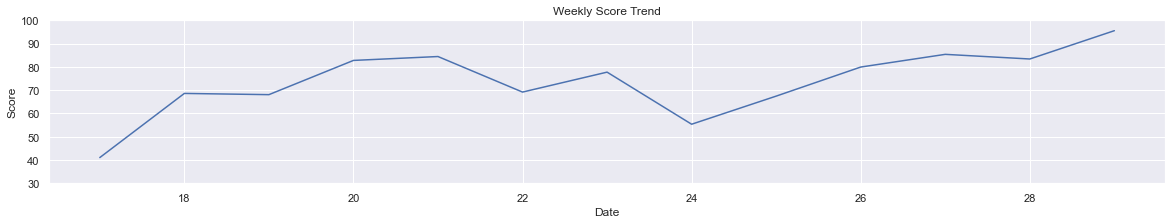

In [4]:
dfu_weekly = df.groupby('adj_weekNumber')['attribute_1'].value_counts().unstack()

dfu_weekly.fillna(0, inplace=True)

this_week = dt.now().strftime('%W')
next_week_num = int(this_week) + 1
dfu_weekly = dfu_weekly[dfu_weekly.index != next_week_num]

dfu_weekly['rating'] = 0

for attribute in dfu_weekly:
    if attribute == 'work':
        dfu_weekly['rating'] = dfu_weekly['rating'] + work * dfu_weekly[attribute]
    if attribute == 'education':
        dfu_weekly['rating'] = dfu_weekly['rating'] + education * dfu_weekly[attribute]
    if attribute == 'study':
        dfu_weekly['rating'] = dfu_weekly['rating'] + study * dfu_weekly[attribute]
    if attribute == 'exercise':
        dfu_weekly['rating'] = dfu_weekly['rating'] + exercise * dfu_weekly[attribute]
    if attribute == 'side hustle':
        dfu_weekly['rating'] = dfu_weekly['rating'] + side_hustle * dfu_weekly[attribute]
    if attribute == 'learn':
        dfu_weekly['rating'] = dfu_weekly['rating'] + learn * dfu_weekly[attribute]
    if attribute == 'church':
        dfu_weekly['rating'] = dfu_weekly['rating'] + church * dfu_weekly[attribute]
    if attribute == 'grocery':
        dfu_weekly['rating'] = dfu_weekly['rating'] + grocery * dfu_weekly[attribute]
    if attribute == 'eat':
        dfu_weekly['rating'] = dfu_weekly['rating'] + eat * dfu_weekly[attribute]
    if attribute == 'read':
        dfu_weekly['rating'] = dfu_weekly['rating'] + read * dfu_weekly[attribute]
    if attribute == 'cook':
        dfu_weekly['rating'] = dfu_weekly['rating'] + cook * dfu_weekly[attribute]
    if attribute == 'hangout':
        dfu_weekly['rating'] = dfu_weekly['rating'] + hangout * dfu_weekly[attribute]
    if attribute == 'call':
        dfu_weekly['rating'] = dfu_weekly['rating'] + call * dfu_weekly[attribute]
    if attribute == 'productive':
        dfu_weekly['rating'] = dfu_weekly['rating'] + productive * dfu_weekly[attribute]
    if attribute == 'meet':
        dfu_weekly['rating'] = dfu_weekly['rating'] + meet * dfu_weekly[attribute]
    if attribute == 'love':
        dfu_weekly['rating'] = dfu_weekly['rating'] + love * dfu_weekly[attribute]
    if attribute == 'walk':
        dfu_weekly['rating'] = dfu_weekly['rating'] + walk * dfu_weekly[attribute]
    if attribute == 'clean':
        dfu_weekly['rating'] = dfu_weekly['rating'] + clean * dfu_weekly[attribute]
    if attribute == 'commute':
        dfu_weekly['rating'] = dfu_weekly['rating'] + commute * dfu_weekly[attribute]
    if attribute == 'shopping':
        dfu_weekly['rating'] = dfu_weekly['rating'] + shopping * dfu_weekly[attribute]
    if attribute == 'hangout':
        dfu_weekly['rating'] = dfu_weekly['rating'] + hangout * dfu_weekly[attribute]
    if attribute == 'walk':
        dfu_weekly['rating'] = dfu_weekly['rating'] + walk * dfu_weekly[attribute]
    if attribute == 'prepare':
        dfu_weekly['rating'] = dfu_weekly['rating'] + prepare * dfu_weekly[attribute]
    if attribute == 'hygiene':
        dfu_weekly['rating'] = dfu_weekly['rating'] + hygiene * dfu_weekly[attribute]
        
dfu_weekly['rating'] = dfu_weekly['rating']/7

# formula for weekly ranking
weekly_ranking = dfu_weekly.copy()
weekly_ranking['week_ranking'] = weekly_ranking['rating'].rank(ascending=False)

# print this week's Score
print(f"\n Week {this_week} score:          {round(float(weekly_ranking[weekly_ranking.index == int(this_week)]['rating']), 1)}")
print(f"\n Week {this_week} all-time Rank:  {int(weekly_ranking[weekly_ranking.index == int(this_week)]['week_ranking'])} out of {int(weekly_ranking['week_ranking'].max())}")

sns.set()

print('\n' + '\t'*9 + '')
dfu_weekly['rating'].plot(kind='line', figsize=(20, 3), grid=True)
plt.title('Weekly Score Trend')
plt.xlabel('Date')
plt.ylabel('Score')
plt.ylim(30,100)
plt.plot()


Today's score:  92.55

Weekly Rank:    1 out of 7

All-time Rank:  4 out of 82 (4th percentile)


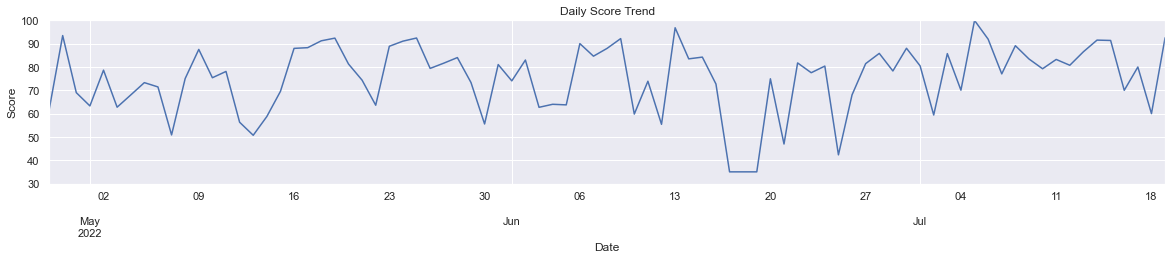

In [5]:
date_to_present = dt.now().strftime('%Y-%m-%d')

dfu = df.groupby('adj_date')['attribute_1'].value_counts().unstack()

dfu = dfu[dfu.index <= date_to_present]

dfu.fillna(0, inplace=True)

dfu = dfu[dfu.index <= dt.now().strftime('%Y-%m-%d')]

dfu['rating'] = 0

for attribute in dfu:
    if attribute == 'work':
        dfu['rating'] = dfu['rating'] + work * dfu[attribute]
    if attribute == 'education':
        dfu['rating'] = dfu['rating'] + education * dfu[attribute]
    if attribute == 'study':
        dfu['rating'] = dfu['rating'] + study * dfu[attribute]
    if attribute == 'exercise':
        dfu['rating'] = dfu['rating'] + exercise * dfu[attribute]
    if attribute == 'side hustle':
        dfu['rating'] = dfu['rating'] + side_hustle * dfu[attribute]
    if attribute == 'learn':
        dfu['rating'] = dfu['rating'] + learn * dfu[attribute]
    if attribute == 'church':
        dfu['rating'] = dfu['rating'] + church * dfu[attribute]
    if attribute == 'grocery':
        dfu['rating'] = dfu['rating'] + grocery * dfu[attribute]
    if attribute == 'eat':
        dfu['rating'] = dfu['rating'] + eat * dfu[attribute]
    if attribute == 'read':
        dfu['rating'] = dfu['rating'] + read * dfu[attribute]
    if attribute == 'cook':
        dfu['rating'] = dfu['rating'] + cook * dfu[attribute]
    if attribute == 'hangout':
        dfu['rating'] = dfu['rating'] + hangout * dfu[attribute]
    if attribute == 'call':
        dfu['rating'] = dfu['rating'] + call * dfu[attribute]
    if attribute == 'productive':
        dfu['rating'] = dfu['rating'] + productive * dfu[attribute]
    if attribute == 'meet':
        dfu['rating'] = dfu['rating'] + meet * dfu[attribute]
    if attribute == 'love':
        dfu['rating'] = dfu['rating'] + love * dfu[attribute]
    if attribute == 'walk':
        dfu['rating'] = dfu['rating'] + walk * dfu[attribute]
    if attribute == 'clean':
        dfu['rating'] = dfu['rating'] + clean * dfu[attribute]
    if attribute == 'commute':
        dfu['rating'] = dfu['rating'] + commute * dfu[attribute]
    if attribute == 'shopping':
        dfu['rating'] = dfu['rating'] + shopping * dfu[attribute]
    if attribute == 'hangout':
        dfu['rating'] = dfu['rating'] + hangout * dfu[attribute]
    if attribute == 'walk':
        dfu['rating'] = dfu['rating'] + walk * dfu[attribute]
    if attribute == 'prepare':
        dfu['rating'] = dfu['rating'] + prepare * dfu[attribute]
    if attribute == 'hygiene':
        dfu['rating'] = dfu['rating'] + hygiene * dfu[attribute]


dfu.loc[dfu['rating'] < 35, 'rating'] = 35
dfu.loc[dfu['rating'] > 100, 'rating'] = 100

# formula for weekly rankings
week_ranking = dfu[(dfu.index > dt.today() - timedelta(days=7))].copy()
week_ranking['week_ranking'] = week_ranking['rating'].rank(ascending=False)

# formula for all time rankings
all_time_ranking = dfu.copy()
all_time_ranking['all_time_ranking'] = all_time_ranking['rating'].rank(ascending=False)

# print Today's Score
if dt.now().hour >= 18:
    print(f"\nToday's score:  {round(dfu[dfu.index == date_to_present]['rating'][0], 2)}")
    print(f"\nWeekly Rank:    {int(week_ranking[week_ranking.index == date_to_present]['week_ranking'][0])} out of 7")
    print(f"\nAll-time Rank:  {int(all_time_ranking[all_time_ranking.index == date_to_present]['all_time_ranking'][0])} out of {int(all_time_ranking['all_time_ranking'].max())} ({int(percentileofscore(all_time_ranking['all_time_ranking'], int(all_time_ranking[all_time_ranking.index == date_to_present]['all_time_ranking'][0])))}th percentile)")
    
dfu['rating'].plot(kind='line', figsize=(20, 3), grid=True)
plt.title('Daily Score Trend')
plt.xlabel('Date')
plt.ylabel('Score')
plt.ylim(30,100)
plt.show()


Day of week Rank:  2 out of 12


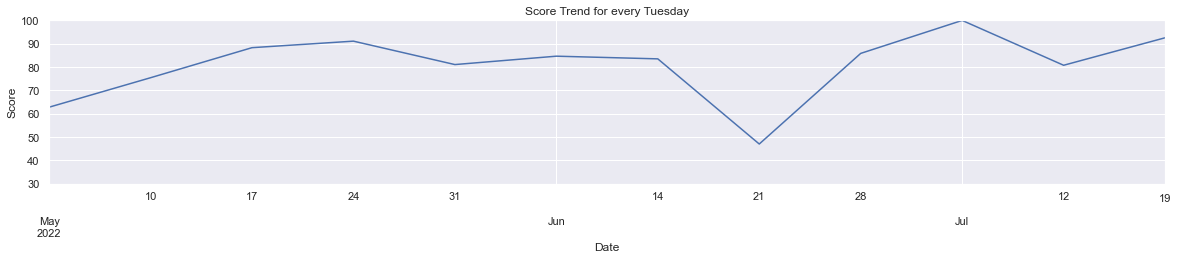

In [6]:
today_day_of_week = dt.now().strftime('%A')

dfu_day_of_week = dfu[dfu.index.strftime('%A') == today_day_of_week]

# formula for day of week rank
day_of_week_rank = dfu_day_of_week.copy()
day_of_week_rank['all_time_ranking'] = day_of_week_rank['rating'].rank(ascending=False)

# print Today's Score
if dt.now().hour >= 18:
    print(f"\nDay of week Rank:  {int(day_of_week_rank[day_of_week_rank.index == date_to_present]['all_time_ranking'][0])} out of {int(day_of_week_rank['all_time_ranking'].max())}")

dfu_day_of_week['rating'].plot(kind='line', figsize=(20, 3), grid=True)
plt.title(f'Score Trend for every {today_day_of_week}')
plt.xlabel('Date')
plt.ylabel('Score')
plt.ylim(30,100)
plt.show()


									This week value distribution %


<AxesSubplot:>

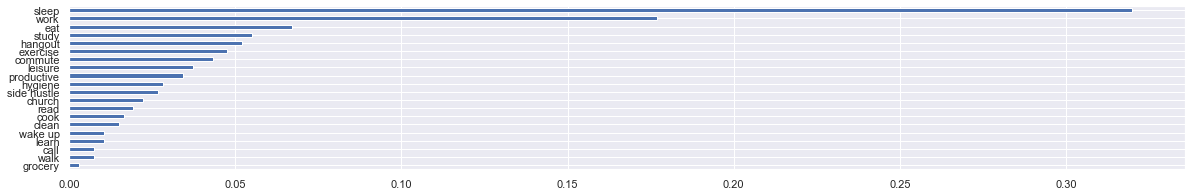

In [7]:
print('\n' + '\t'*9 + 'This week value distribution %')
this_weeknum = int(dt.now().strftime('%W'))
weekly_distribution = df[df['adj_weekNumber'] == this_weeknum]['attribute_1'].value_counts(normalize=True, ascending=True)
weekly_distribution.plot(kind='barh', figsize=(20, 3), grid=True)



									Compared to last week in hours


<AxesSubplot:>

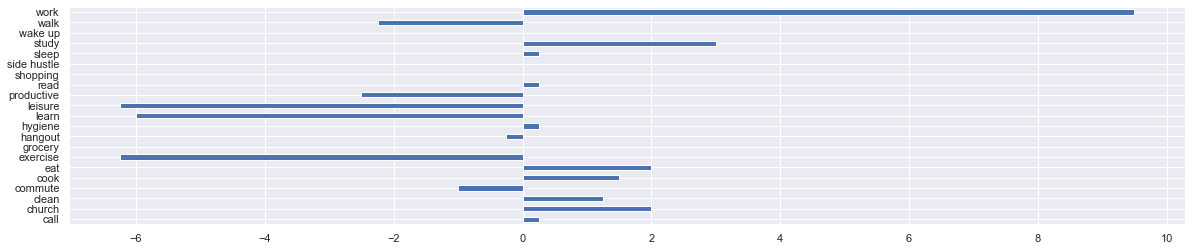

In [8]:
print('\n' + '\t'*9 + 'Compared to last week in hours')
difference = (df[df['adj_weekNumber'] == this_weeknum]['attribute_1'].value_counts() - df[df['adj_weekNumber'] == this_weeknum-1]['attribute_1'].value_counts()) / 4
difference.plot(kind='barh', figsize=(20, 4), grid=True)

# Study/Learn vs. Leisure
# Study/Learn vs. Leisure


									Study/Learn vs. Leisure



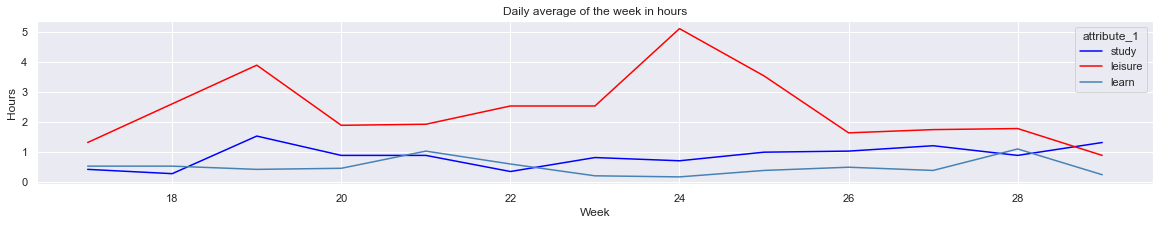

In [14]:
print('\n' + '\t'*9 + 'Study/Learn vs. Leisure\n')

dfu_weekly_in_hours.sort_values(by='adj_weekNumber', ascending=False).head(2)
dfu_weekly_in_hours[['study', 'leisure', 'learn']].plot(kind='line', figsize=(20, 3), grid=True, color=['blue', 'red', 'steelblue'])
plt.title('Daily average of the week in hours')
plt.xlabel('Week')
plt.ylabel('Hours')
plt.show()


									Study/Learn vs. Leisure



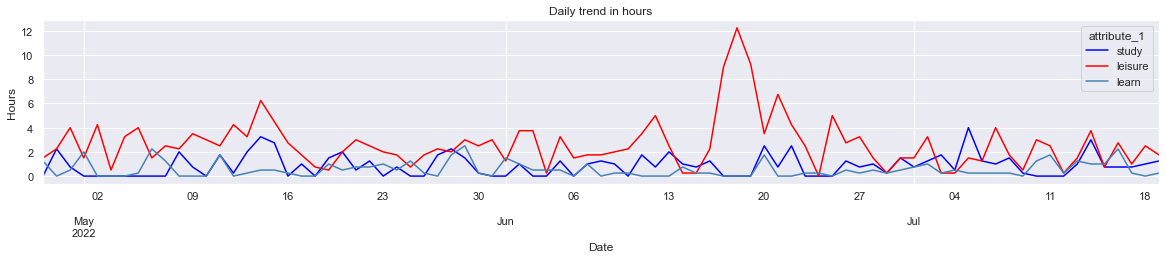

In [15]:
print('\n' + '\t'*9 + 'Study/Learn vs. Leisure\n')

dfu_in_hours.sort_values(by='adj_date', ascending=False).head(2)
dfu_in_hours[['study', 'leisure', 'learn']].plot(kind='line', figsize=(20, 3), grid=True, color=['blue', 'red', 'steelblue'])
plt.title('Daily trend in hours')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.show()


									Study/Learn vs. Leisure



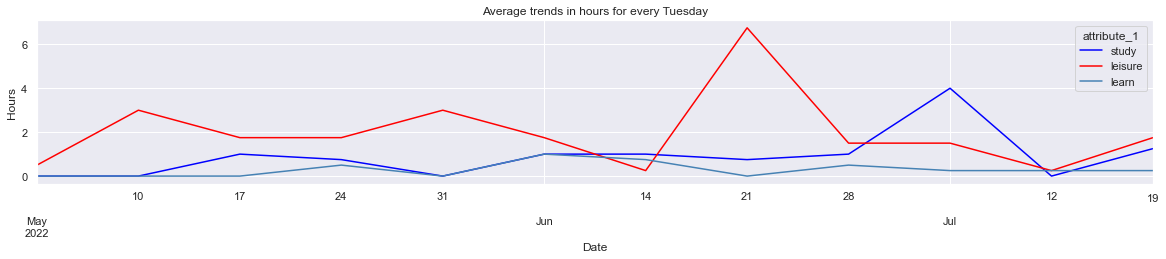

In [16]:
print('\n' + '\t'*9 + 'Study/Learn vs. Leisure\n')

dfu_day_of_week_in_hours.sort_values(by='adj_date', ascending=False).head(2)
dfu_day_of_week_in_hours[['study', 'leisure', 'learn']].plot(kind='line', figsize=(20, 3), grid=True, color=['blue', 'red', 'steelblue'])
plt.title(f'Average trends in hours for every {today_day_of_week}')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.show()

In [19]:
highest_performing_past_7_days = dfu[(dfu.index > (dt.now() - timedelta(days=7))) & (dfu.index < (dt.now() - timedelta(days=1)))].sort_values(by='rating', ascending=False).head(1).index.to_series()[0]

best_7_days_score_progress = df[df.date == highest_performing_past_7_days].groupby('hour')['attribute_1'].value_counts().unstack()
best_7_days_score_progress.fillna(0, inplace=True)
best_7_days_score_progress['best_7_day_rating'] = 0

for attribute in best_7_days_score_progress:
    if attribute == 'work':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + work * best_7_days_score_progress[attribute]
    if attribute == 'education':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + education * best_7_days_score_progress[attribute]
    if attribute == 'study':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + study * best_7_days_score_progress[attribute]
    if attribute == 'exercise':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + exercise * best_7_days_score_progress[attribute]
    if attribute == 'side hustle':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + side_hustle * best_7_days_score_progress[attribute]
    if attribute == 'learn':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + learn * best_7_days_score_progress[attribute]
    if attribute == 'church':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + church * best_7_days_score_progress[attribute]
    if attribute == 'grocery':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + grocery * best_7_days_score_progress[attribute]
    if attribute == 'eat':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + eat * best_7_days_score_progress[attribute]
    if attribute == 'read':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + read * best_7_days_score_progress[attribute]
    if attribute == 'cook':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + cook * best_7_days_score_progress[attribute]
    if attribute == 'hangout':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + hangout * best_7_days_score_progress[attribute]
    if attribute == 'call':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + call * best_7_days_score_progress[attribute]
    if attribute == 'productive':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + productive * best_7_days_score_progress[attribute]
    if attribute == 'meet':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + meet * best_7_days_score_progress[attribute]
    if attribute == 'love':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + love * best_7_days_score_progress[attribute]
    if attribute == 'walk':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + walk * best_7_days_score_progress[attribute]
    if attribute == 'clean':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + clean * best_7_days_score_progress[attribute]
    if attribute == 'commute':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + commute * best_7_days_score_progress[attribute]
    if attribute == 'shopping':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + shopping * best_7_days_score_progress[attribute]
    if attribute == 'hangout':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + hangout * best_7_days_score_progress[attribute]
    if attribute == 'walk':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + walk * best_7_days_score_progress[attribute]
    if attribute == 'prepare':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + prepare * best_7_days_score_progress[attribute]
    if attribute == 'hygiene':
        best_7_days_score_progress['best_7_day_rating'] = best_7_days_score_progress['best_7_day_rating'] + hygiene * best_7_days_score_progress[attribute]
        
best_7_days_score_progress = best_7_days_score_progress.cumsum()
        
best_7_days_score = round(max(best_7_days_score_progress[(best_7_days_score_progress.index <= dt.now().strftime('%H%M'))]['best_7_day_rating']), 2)

In [20]:
today_score_progress = df[df.date == date_to_present].groupby('hour')['attribute_1'].value_counts().unstack()
today_score_progress.fillna(0, inplace=True)
today_score_progress['today_rating'] = 0

for attribute in today_score_progress:
    if attribute == 'work':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + work * today_score_progress[attribute]
    if attribute == 'education':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + education * today_score_progress[attribute]
    if attribute == 'study':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + study * today_score_progress[attribute]
    if attribute == 'exercise':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + exercise * today_score_progress[attribute]
    if attribute == 'side hustle':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + side_hustle * today_score_progress[attribute]
    if attribute == 'learn':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + learn * today_score_progress[attribute]
    if attribute == 'church':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + church * today_score_progress[attribute]
    if attribute == 'grocery':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + grocery * today_score_progress[attribute]
    if attribute == 'eat':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + eat * today_score_progress[attribute]
    if attribute == 'read':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + read * today_score_progress[attribute]
    if attribute == 'cook':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + cook * today_score_progress[attribute]
    if attribute == 'hangout':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + hangout * today_score_progress[attribute]
    if attribute == 'call':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + call * today_score_progress[attribute]
    if attribute == 'productive':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + productive * today_score_progress[attribute]
    if attribute == 'meet':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + meet * today_score_progress[attribute]
    if attribute == 'love':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + love * today_score_progress[attribute]
    if attribute == 'walk':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + walk * today_score_progress[attribute]
    if attribute == 'clean':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + clean * today_score_progress[attribute]
    if attribute == 'commute':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + commute * today_score_progress[attribute]
    if attribute == 'shopping':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + shopping * today_score_progress[attribute]
    if attribute == 'hangout':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + hangout * today_score_progress[attribute]
    if attribute == 'walk':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + walk * today_score_progress[attribute]
    if attribute == 'prepare':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + prepare * today_score_progress[attribute]
    if attribute == 'hygiene':
        today_score_progress['today_rating'] = today_score_progress['today_rating'] + hygiene * today_score_progress[attribute]
        
today_score_progress = today_score_progress.cumsum()
        
current_score = round(max(today_score_progress[(today_score_progress.index <= dt.now().strftime('%H%M'))]['today_rating']), 2)

Current Score: 79.7
Best 7 days Score: 83.4


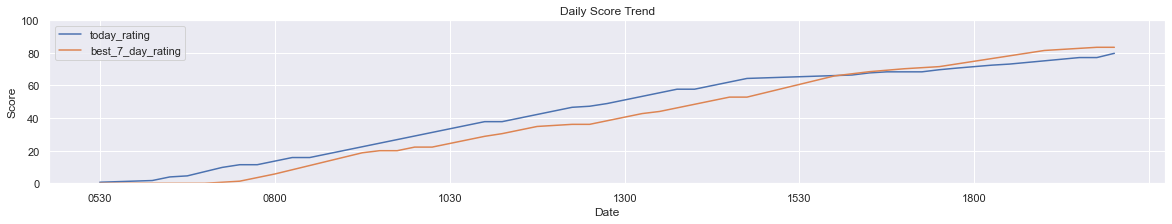

In [21]:
today_score_value = today_score_progress[(today_score_progress.index <= dt.now().strftime('%H%M')) & (today_score_progress.index >= '0530') & (today_score_progress.index <= '2200')]['today_rating']
best_7_days_score_value = best_7_days_score_progress[(best_7_days_score_progress.index <= dt.now().strftime('%H%M')) & (best_7_days_score_progress.index >= '0530') & (best_7_days_score_progress.index <= '2200')]['best_7_day_rating']

merged_columns = pd.concat([today_score_value, best_7_days_score_value], axis=1)

print(f'Current Score: {current_score}')
print(f'Best 7 days Score: {best_7_days_score}')

merged_columns.plot(kind='line', figsize=(20, 3), grid=True)
plt.title('Daily Score Trend')
plt.xlabel('Date')
plt.ylabel('Score')
plt.ylim(0,100)
plt.show()